In [1]:
import arcgis
from arcgis.gis import GIS
from arcgis.apps import storymap
from getpass import getpass

# Create a connection to your portal for publishing
gis = GIS("https://www.arcgis.com", "ScottMooreDCCED", getpass())

········


<Item title:"Scott's Hoonah Copy" type:Web Mapping Application owner:DCRAOpenData>
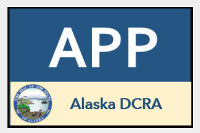

In [2]:
#get a reference to a seed storymap
seedappItem = gis.content.get("2a51cb9cc9d54b57a52c67d8efdb5eba")
#print it's item card out in the Jupyter Notebook window
seedappItem

In [3]:
#Get access to the ContentManager object so we can access it's method of cloning items like webmaps/apps
contentManager = arcgis.gis.ContentManager(gis)

In [27]:
#clone_items clones an array of Item objects. That is why we need to wrap seedappItem in brackets below
#it returns an array of cloned items. search_existing_items set false will allow you to clone an item more than once
clones = contentManager.clone_items(items=[seedappItem],search_existing_items=False)

In [26]:
clones

[<Item title:"Scott's Hoonah Copy" type:Web Mapping Application owner:ScottMooreDCCED>]

In [17]:
#from the Item object above, get a storymap Journal item using the storymap submodule.  Now we have a storymap instance
#instead of a generic Item instance
clonedStorymap = storymap.JournalStoryMap(clones[0])

In [18]:
#now that we have a clone, we need to change the Item's title and description, and maybe tags
clonedStorymap.save(title="City A",description="City A Storymap Description",tags="City A, Storymap")

True

In [19]:
#print out the new item details
clonedStorymap.properties["values"]["story"]["sections"]

[{'title': '<span style="font-size:40px">Hoonah, Alaska</span>',
  'content': '<style type="text/css">.blue {\n     display: inline-block;\n     background-color: #2c7bb6;\n     border-color: #2c7bb6 !important;\n     color: #fff !important;\n     padding: 0px 4px;\n     border-radius: 0px;\n}\n</style>\n<p><span style="font-size:28px">Table of Contents</span><a data-storymaps="MJ-ACTION-1524782969520" data-storymaps-type="navigate"> </a></p>\n\n<p>&nbsp;</p>\n\n<p><a data-storymaps="MJ-ACTION-1524782969520" data-storymaps-type="navigate">Culture and History</a></p>\n\n<p><span style="font-size:20px"><a class="peach" data-storymaps="MJ-ACTION-1524783369112" data-storymaps-type="navigate">Demographics</a></span></p>\n\n<p><span style="font-size:20px"><a data-storymaps="MJ-ACTION-1524784937326" data-storymaps-type="navigate">Transportation</a></span></p>\n\n<p><span style="font-size:20px"><a data-storymaps="MJ-ACTION-1524786044096" data-storymaps-type="navigate">Education</a></span></p>\

In [20]:
#want to change the linkText in the header? This is how you would do it
clonedStorymap.header["linkText"] = "Python is fun!"
clonedStorymap.save()

True

In [21]:
#want to change the title in the first section? This is how you would do it
clonedStorymap.properties["values"]["story"]["sections"][0]["title"] = '<span style="font-size:40px">ScottMoore, Alaska</span>'
clonedStorymap.save()

True

In [22]:
#want to change the image used in the storymaps first section? Here is how you would do it
clonedStorymap.properties["values"]["story"]["sections"][0]["media"]["image"]["url"] = 'https://upload.wikimedia.org/wikipedia/commons/d/d3/Aerial_photo_of_Hoonah%2C_Alaska.jpg'
clonedStorymap.save()

True